# 03 - Visualization

In [59]:
import xarray as xr
import matplotlib.pyplot as plt

In [60]:
WSEL_RECHUNKED_ZARR = "./data/wsel_rechunked.zarr"

In [61]:
# check out the results
depth_quantiles_ds = xr.open_zarr('./data/depth_quantiles.zarr')
depth_quantiles_ds

<xarray.Dataset>
Dimensions:      (aep: 4, y: 1024, x: 1024)
Coordinates:
  * aep          (aep) float64 0.1 0.02 0.01 0.002
  * x            (x) float64 1.091e+06 1.091e+06 ... 1.096e+06 1.096e+06
  * y            (y) float64 1.919e+06 1.919e+06 ... 1.914e+06 1.914e+06
Data variables:
    depth        (aep, y, x) float32 dask.array<chunksize=(4, 16, 16), meta=np.ndarray>
    lower_ci     (aep, y, x) float32 dask.array<chunksize=(4, 16, 16), meta=np.ndarray>
    spatial_ref  int64 ...
    upper_ci     (aep, y, x) float32 dask.array<chunksize=(4, 16, 16), meta=np.ndarray>

## Depth

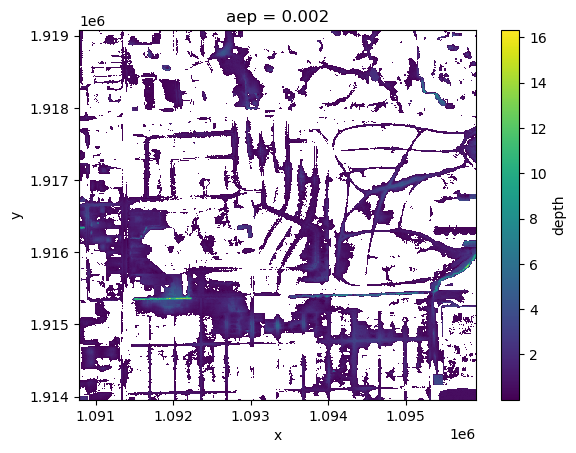

In [62]:
# depth at AEP == 0.002 (500-yr return period)
depth = depth_quantiles_ds.depth.sel(aep=0.002)
depth.where(depth > 0.0).plot()

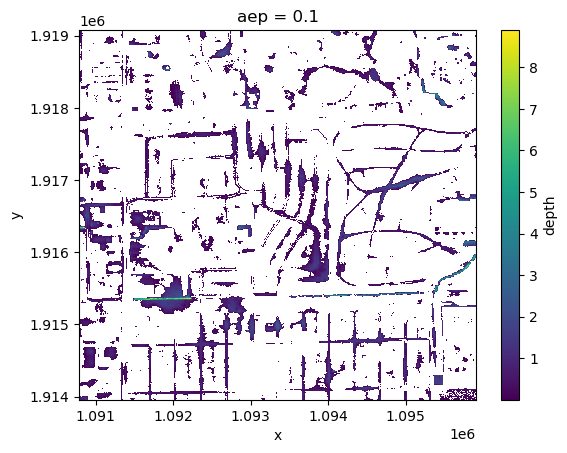

In [63]:
# depth at AEP == 0.1 (10-yr return period)
depth = depth_quantiles_ds.depth.sel(aep=0.1)
depth.where(depth > 0.0).plot()

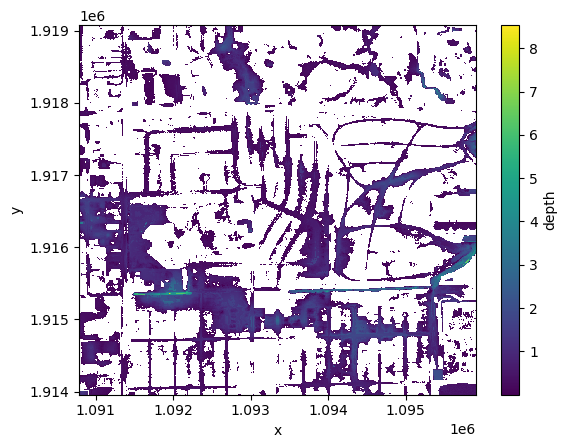

In [64]:
# difference in depth between 500-yr and 10-yr return periods
delta = depth_quantiles_ds.depth.sel(aep=0.002) - depth_quantiles_ds.depth.sel(aep=0.1)
delta.where(delta > 0.0).plot()

## Confidence Interval

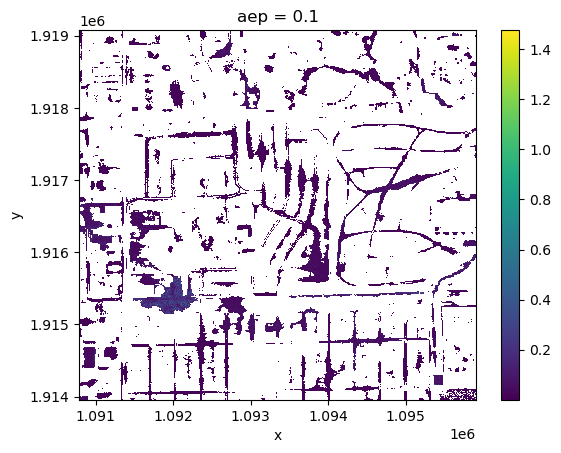

In [65]:
# 10-year return period CI range
ci_range = depth_quantiles_ds.upper_ci.sel(aep=0.1) - depth_quantiles_ds.lower_ci.sel(aep=0.1)
ci_range.where(ci_range > 0.0).plot()

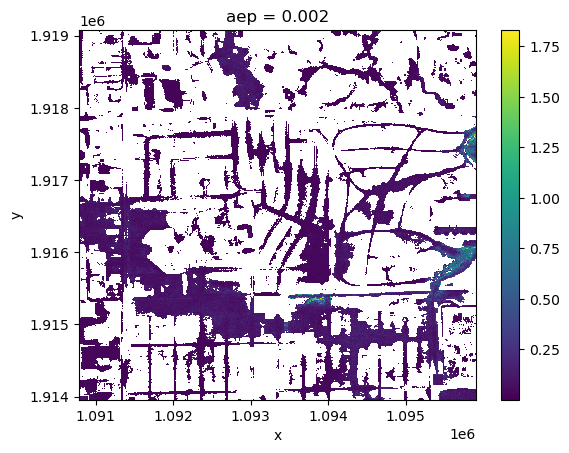

In [66]:
# 500-year return period CI range
ci_range = depth_quantiles_ds.upper_ci.sel(aep=0.002) - depth_quantiles_ds.lower_ci.sel(aep=0.002)
ci_range.where(ci_range > 0.0).plot()

## Water Surface Elevation

In [67]:
# load terrain data as an xarray DataArray
wsel_ds = xr.open_zarr(WSEL_RECHUNKED_ZARR)
terrain_da = wsel_ds.terrain

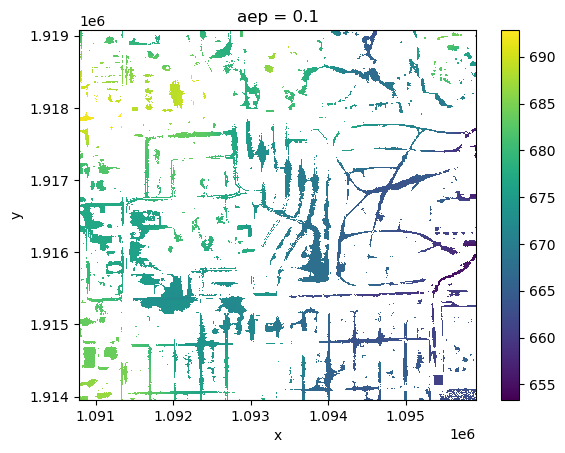

In [68]:
# 10-year water surface elevation
depth_10yr = depth_quantiles_ds.depth.sel(aep=0.1)
(depth_10yr + terrain_da).where(depth_10yr > 0.0).plot()

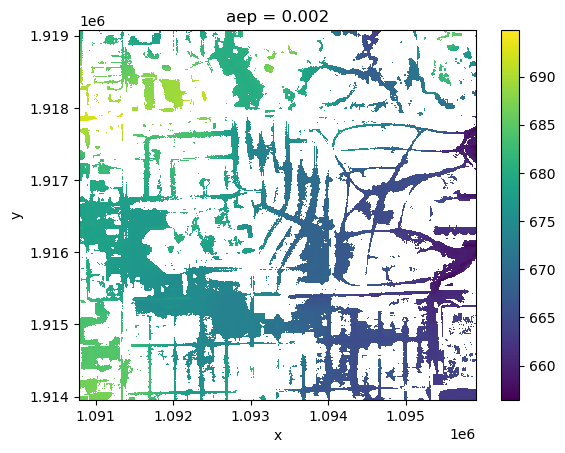

In [69]:
# 500-year water surface elevation
depth_500yr = depth_quantiles_ds.depth.sel(aep=0.002)
(depth_500yr + terrain_da).where(depth_500yr > 0.0).plot()

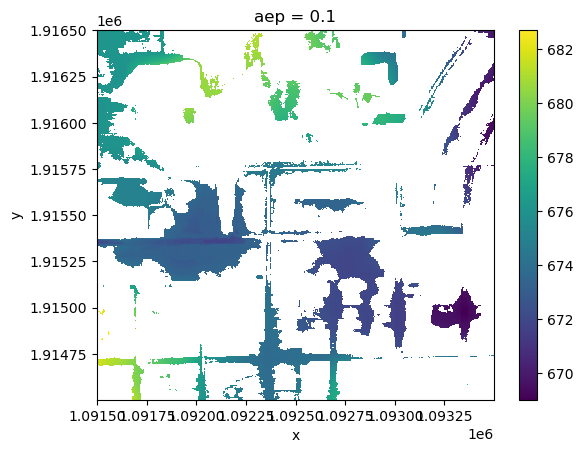

In [75]:
# 10-year water surface elevation (zoomed in)
(depth_10yr + terrain_da).sel(x=slice(1091500, 1093500),
                              y=slice(1916500, 1914500)).where(depth_10yr > 0.0).plot()

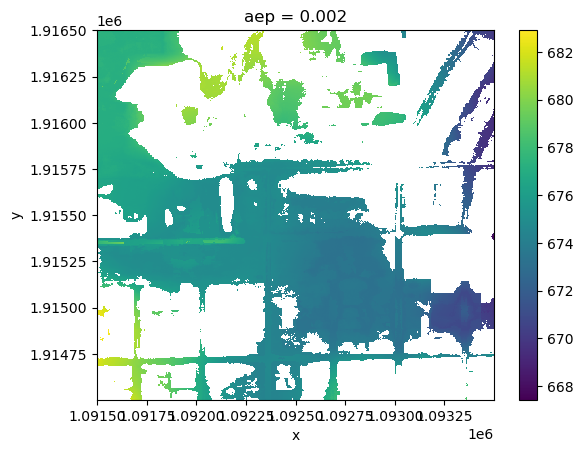

In [70]:
# 500-year water surface elevation (zoomed in)
(depth_500yr + terrain_da).sel(x=slice(1091500, 1093500),
                               y=slice(1916500, 1914500)).where(depth_500yr > 0.0).plot()

### Depth-AEP Hazard Curves

In [71]:
def plot_depth_aep_curve(ds: xr.Dataset, x: float, y: float):
    depth = depth_quantiles_ds.depth.sel(x=x, y=y, method='nearest').values
    lower_ci = depth_quantiles_ds.lower_ci.sel(x=x, y=y, method='nearest').values
    upper_ci = depth_quantiles_ds.upper_ci.sel(x=x, y=y, method='nearest').values
    return_periods = [1/aep for aep in depth_quantiles_ds.aep.values]
    plt.plot(return_periods, depth, label='depth')
    plt.plot(return_periods, lower_ci, label='lower_ci')
    plt.plot(return_periods, upper_ci, label='upper_ci')
    plt.xscale('log')
    plt.xticks(return_periods, return_periods)
    plt.ylim(bottom=0.0)
    plt.legend()
    plt.show()

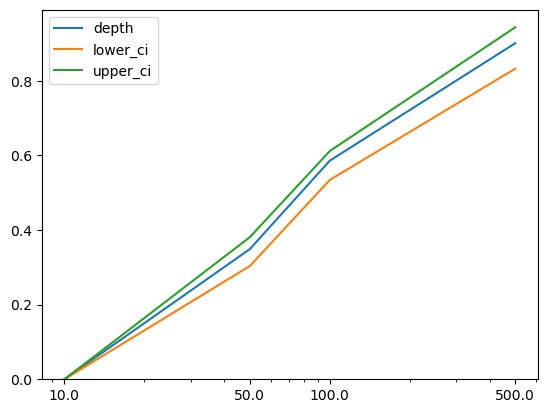

In [72]:
x = 1092500
y = 1915200
plot_depth_aep_curve(depth_quantiles_ds, x, y)

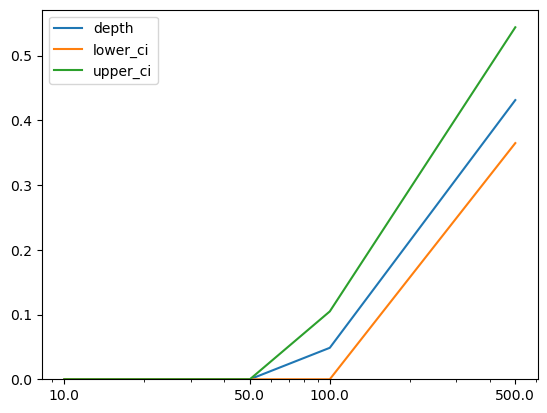

In [73]:
x = 1092300
y = 1915200
plot_depth_aep_curve(depth_quantiles_ds, x, y)

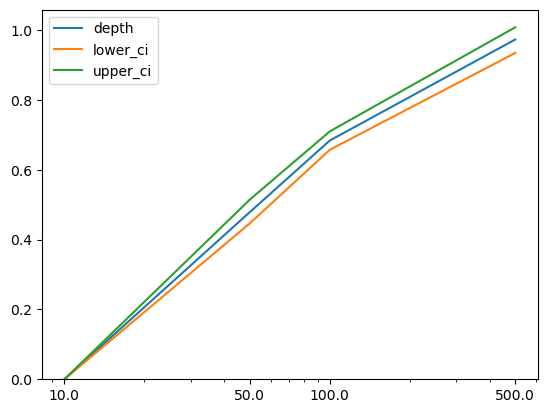

In [74]:
x = 1092300
y = 1915300
plot_depth_aep_curve(depth_quantiles_ds, x, y)